# <font color=purple> Machine Learning

<font color=purple> **The objective of this project is twofold: to delve into the study of machine learning libraries while advancing further in the exploration of Jupyter Notebook and Python. The project encompasses a many dataset and offers a range of exercises involving those datasets.** <font>

Several practices will be employed in this study:

1- Below certain commands, there will be a summary of their meanings.

2- All text will be written in English.

3- The data has been extracted from exercises on the Alura platform.

4- Each dataset will have a summary of its meaning.

# About


Machine Learning: Optimization of Models through Hyperparameters, focuses on optimizing machine learning models by adjusting their hyperparameters, a crucial step following foundational courses on machine learning classification and cross-validation. It delves into decision trees to illustrate how setting a parameter like max_depth can affect model complexity and performance. For example, increasing max_depth from 2 to 3 can improve a model's accuracy, but setting it too high might lead to overfitting, where the model performs well on training data but poorly on new, unseen data.

Highlighting the challenge of finding the optimal max_depth, considering the computational cost of testing various hyperparameters. It introduces strategies for managing this, such as parallel processing or exploring hyperparameters in segments, though these approaches do not guarantee the best model will be found. The curriculum expands to cover decision trees with multiple parameters, creating a grid of hyperparameters to explore their impact on model quality, using metrics like accuracy for evaluation.

We will use tools like SKLearn's GridSearchCV and cross-validation to systematically search for and evaluate the best model configurations, acknowledging SKLearn's current limitations and anticipating future improvements.

In [1]:
# Imports

import pandas as pd
import numpy as np
import graphviz
import seaborn as sns
import time

from string import ascii_letters
import matplotlib.pyplot as plt

# SKlearn imports

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, GroupKFold, cross_validate, cross_val_score , KFold
from sklearn.metrics import accuracy_score
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit

# Datasets

url_1 = 'https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv'

# Readers

data_1 = pd.read_csv(url_1, header=0, names=['price','sold','model_age','km_per_year'])

# Random

SEED = 301
np.random.seed(SEED)

In [2]:
# Checking Dataset

data_1.head()

,price,sold,model_age,km_per_year
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [3]:
# Creating dummy classifier on unlucky example

data_un = data_1.sort_values('sold',ascending =True)

x_un = data_1[['price','model_age','km_per_year']]
y_un = data_1['sold']

model = DummyClassifier(strategy='stratified')
results = cross_validate(model, x_un, y_un, cv=10, return_train_score=False)
mean= results['test_score'].mean()
std = results['test_score'].std()

print(f'Accuracy Cross Validation: {((mean - 2 * std) * 100 , (mean + 2 * std) * 100)}')

Accuracy Cross Validation: (48.95165658426994, 55.288343415730054)


In [4]:
# Creating decision tree classifier

model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, x_un, y_un, cv=10, return_train_score=False)
mean= results['test_score'].mean()
std = results['test_score'].std()

print(f'Accuracy Cross Validation: {((mean - 2 * std) * 100 , (mean + 2 * std) * 100)}')

Accuracy Cross Validation: (74.24168923815763, 77.31831076184234)


In [5]:
# Generating random car model data for clustering simulation when using our estimator

np.random.seed(SEED)
data_1['model'] = data_1.model_age + np.random.randint(-2, 3, size=10000)
data_1.model = data_1.model + abs(data_1.model.min()) + 1
data_1.head()

,price,sold,model_age,km_per_year,model
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [6]:
# Creating Function to easily acess results

def print_results(results):
    mean = results['test_score'].mean() * 100
    std = results['test_score'].std() * 100
    print(f'Mean Accuracy: {mean}')
    print(f'Interval: {((mean - 2 * std) , (mean + 2 * std))}')

In [7]:
# Using svc and pipeline

scaler = StandardScaler()
model = SVC()

pipeline = Pipeline([('Transformation', scaler), ('Estimator', model)])

cv = GroupKFold(n_splits=10)
results = cross_validate(pipeline, x_un, y_un, cv=cv, groups=data_1.model, return_train_score=False)
print_results(results)

Mean Accuracy: 76.54932941140034
Interval: (73.21680961973651, 79.88184920306416)


In [8]:
# Applying groupkfold in the new column

cv = GroupKFold(n_splits=10)
model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, x_un, y_un, cv = cv, groups= data_1.model, return_train_score=False)
print_results(results)

Mean Accuracy: 75.80063581197803
Interval: (71.99787144411974, 79.60340017983631)


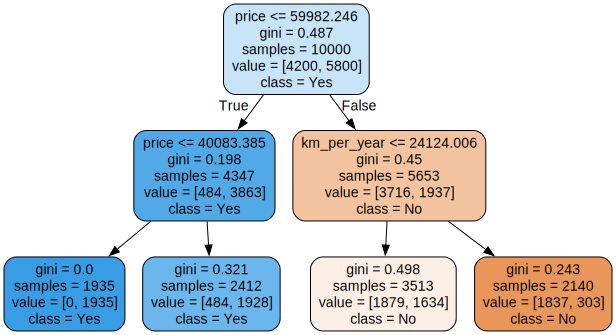

In [9]:
# Checking decision tree

model.fit(x_un, y_un)
features = x_un.columns
dot_data = export_graphviz(model, out_file=None, filled=True, rounded=True, class_names=['No','Yes'], feature_names=features)

graph = graphviz.Source(dot_data)
graph

In [10]:
# Testing decision tree with one parameter

def decision_tree_testing(max_depth):
    
    cv = GroupKFold(n_splits=10)
    model = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(model, x_un, y_un, cv=cv, groups= data_1.model, return_train_score=True)
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100 
    table = [max_depth, train_score, test_score]
    return table

results = [decision_tree_testing(i) for i in range (1, 31)]
results = pd.DataFrame(results, columns=['Max Depth','Train Score','Test Score'])
results.set_index('Max Depth', inplace=True)
results.T


# Here we can check the difference between train and test, the algorithim is making the train result to become perfect (Overfiting)

Max Depth,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Train Score,75.791383,75.791383,78.757964,78.786833,78.891330,79.158097,79.486963,79.887982,80.351364,81.033490,...,91.885069,92.768472,93.635135,94.479474,95.172736,95.882521,96.540135,97.189886,97.703960,98.199377
Test Score,75.800636,75.800636,78.674575,78.634672,78.548229,78.366375,78.011172,77.886399,77.704517,77.084263,...,73.638415,73.658570,73.582438,73.197126,73.004442,73.284666,73.119384,72.989858,72.542416,72.604857


<Axes: xlabel='Max Depth', ylabel='Train Score'>

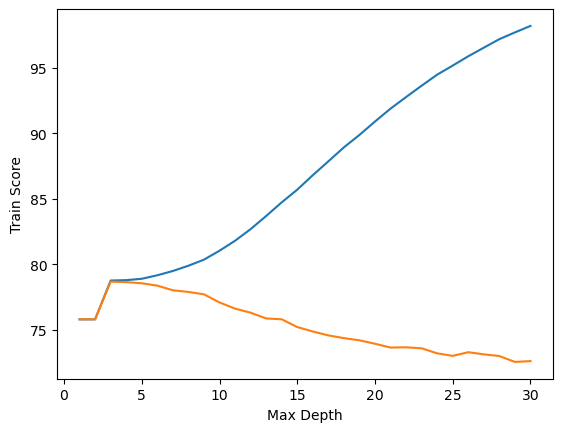

In [11]:
# Graphic Visualization

sns.lineplot(x='Max Depth', y='Train Score', data=results)
sns.lineplot(x='Max Depth', y='Test Score', data=results)

# Clear case of Overfiting

In [12]:
# Testing decision tree with two parameters

def decision_tree_testing_2(max_depth, min_samples_leaf):
    
    cv = GroupKFold(n_splits=10)
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    results = cross_validate(model, x_un, y_un, cv=cv, groups= data_1.model, return_train_score=True)
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100 
    table = [max_depth, min_samples_leaf, train_score, test_score]
    return table

def search():
    results = []
    for max_depth in range(1, 31):
        for min_sample_leaf in [32,64,128,256]:
            table = decision_tree_testing_2(max_depth, min_sample_leaf)
            results.append(table)
    results = pd.DataFrame(results, columns=['Max Depth','Min Samples Leaf', 'Train Score','Test Score'])
    return results

results = search()
results.head()

,Max Depth,Min Samples Leaf,Train Score,Test Score
0,1,32,75.791383,75.800636
1,1,64,75.791383,75.800636
2,1,128,75.791383,75.800636
3,1,256,75.791383,75.800636
4,2,32,75.791383,75.800636


In [13]:
# Checking the best test score

results.sort_values('Test Score', ascending=False).head()

,Max Depth,Min Samples Leaf,Train Score,Test Score
12,4,32,78.752411,78.694626
9,3,64,78.752411,78.694626
19,5,256,78.752411,78.694626
15,4,256,78.752411,78.694626
14,4,128,78.752411,78.694626


<Axes: >

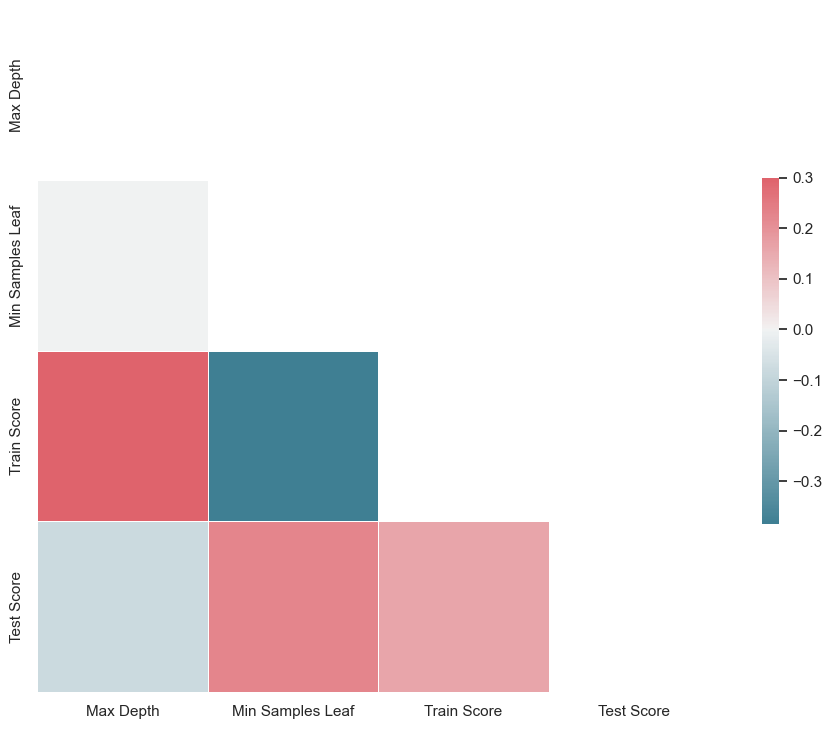

In [14]:
# Checking correlation

corr = results.corr()

sns.set(style="white")

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
# By corelation we can check that the highest min samples leaf the better quality for the test score, now lets test with higher sample leaf numbers to check the difference

def search():
    results = []
    for max_depth in range(1, 31):
        for min_sample_leaf in [128, 192, 256, 512]:
            table = decision_tree_testing_2(max_depth, min_sample_leaf)
            results.append(table)
    results = pd.DataFrame(results, columns=['Max Depth','Min Samples Leaf', 'Train Score','Test Score'])
    return results

results = search()
results.sort_values('Test Score', ascending=False).head()

,Max Depth,Min Samples Leaf,Train Score,Test Score
10,3,256,78.752411,78.694626
8,3,128,78.752411,78.694626
18,5,256,78.752411,78.694626
14,4,256,78.752411,78.694626
13,4,192,78.752411,78.694626


<Axes: >

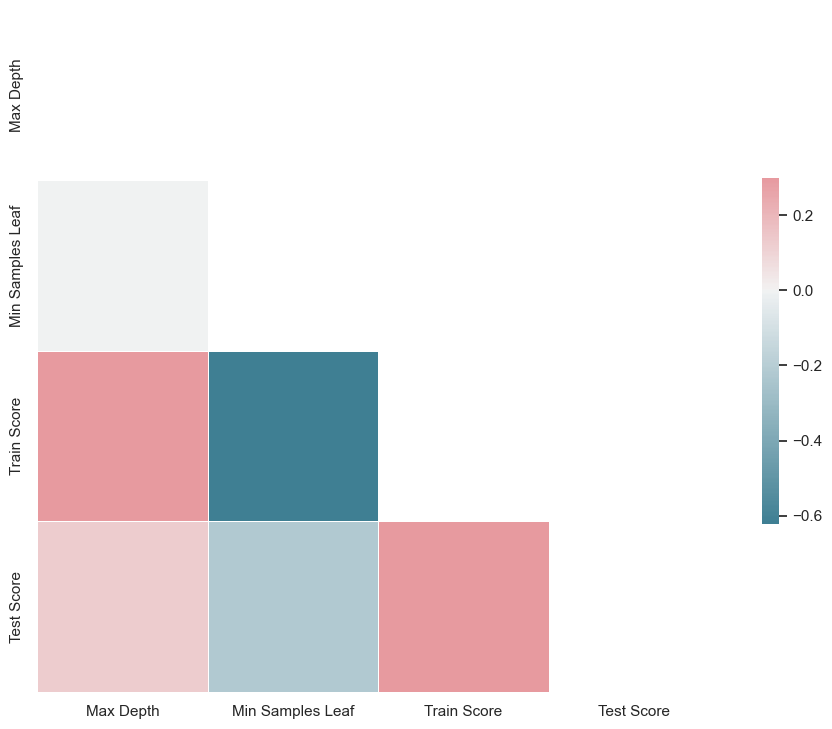

In [16]:
# Checking corr

corr = results.corr()

sns.set(style="white")

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Here we can see that our min sample leaf started to increase the test felt.

In [17]:
# Testing decision tree with three parameters & checking time to process each step.

def decision_tree_testing_3(max_depth, min_samples_leaf, min_samples_split):
    
    cv = GroupKFold(n_splits=10)
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
    results = cross_validate(model, x_un, y_un, cv=cv, groups= data_1.model, return_train_score=True)
    fit_time = results['fit_time'].mean()
    score_time = results['score_time'].mean()
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100 
    table = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
    return table

def search():
    results = []
    for max_depth in range(1, 31):
        for min_sample_leaf in [32,64,128,256]:
            for min_samples_split in [32,64,128,256]:
                table = decision_tree_testing_3(max_depth, min_sample_leaf, min_samples_split)
                results.append(table)
    results = pd.DataFrame(results, columns=['Max Depth','Min Samples Leaf','Min Samples Split','Train Score','Test Score','Fit Time','Score Time'])
    return results

results = search()
results.sort_values('Test Score', ascending=False).head()

,Max Depth,Min Samples Leaf,Min Samples Split,Train Score,Test Score,Fit Time,Score Time
54,4,64,128,78.752411,78.694626,0.0204,0.0021
59,4,128,256,78.752411,78.694626,0.0203,0.0021
57,4,128,64,78.752411,78.694626,0.0201,0.0023
56,4,128,32,78.752411,78.694626,0.0200,0.0023
55,4,64,256,78.752411,78.694626,0.0208,0.0021


In [18]:
# Applying GridSearchCV

parameter_space = {
    'max_depth': [3,5],
    'min_samples_split': [32,64,128],
    'min_samples_leaf': [32,64,128],
    'criterion': ['gini','entropy']
}

search = GridSearchCV(DecisionTreeClassifier(), parameter_space, cv=GroupKFold(10))
search.fit(x_un, y_un, groups=data_1.model)
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0169,0.001221,0.0023,0.000640,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.80773,...,0.791045,0.798379,0.758964,0.793138,0.788889,0.782653,0.768727,0.786946,0.014023,1
1,0.0176,0.001625,0.0019,0.000539,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.80773,...,0.791045,0.798379,0.758964,0.793138,0.788889,0.782653,0.768727,0.786946,0.014023,1
2,0.0164,0.001200,0.0019,0.000539,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.80773,...,0.791045,0.798379,0.758964,0.793138,0.788889,0.782653,0.768727,0.786946,0.014023,1
3,0.0173,0.001616,0.0021,0.000538,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.80773,...,0.791045,0.798379,0.758964,0.793138,0.788889,0.782653,0.768727,0.786946,0.014023,1
4,0.0168,0.001400,0.0018,0.000400,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.80773,...,0.791045,0.798379,0.758964,0.793138,0.788889,0.782653,0.768727,0.786946,0.014023,1


In [19]:
# Checking best parameters / score

print(search.best_params_, search.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32} 78.69462611699876


In [20]:
# Best Estimator

best = search.best_estimator_
best

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [21]:
# Checking accuracy

# Avoid using predict, just for demonstration.

prediction = best.predict(x_un)
accuracy = accuracy_score(prediction, y_un)
print(f'Accuracy score is: {accuracy * 100} %')

Accuracy score is: 78.75 %


In [22]:
# Creating dataframe using kfold

parameter_space = {
    'max_depth': [3,5],
    'min_samples_split': [32,64,128],
    'min_samples_leaf': [32,64,128],
    'criterion': ['gini','entropy']
}

search = GridSearchCV(DecisionTreeClassifier(), parameter_space, cv=KFold(n_splits = 5))
search.fit(x_un, y_un)
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0142,0.000400,0.0020,2.336015e-07,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78,0.7905,0.792,0.784,0.788,0.7869,0.004386,1
1,0.0152,0.000980,0.0018,4.000187e-04,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78,0.7905,0.792,0.784,0.788,0.7869,0.004386,1
2,0.0148,0.001600,0.0018,4.002811e-04,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78,0.7905,0.792,0.784,0.788,0.7869,0.004386,1
3,0.0146,0.001855,0.0028,1.167022e-03,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78,0.7905,0.792,0.784,0.788,0.7869,0.004386,1
4,0.0150,0.001414,0.0020,2.780415e-07,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.78,0.7905,0.792,0.784,0.788,0.7869,0.004386,1


In [23]:
# Applying cross value score

scores = cross_val_score(search, x_un, y_un, cv = KFold(n_splits=5, shuffle=True))
scores

array([0.7895, 0.7985, 0.7625, 0.788 , 0.795 ])

In [24]:
# Checking interval

def print_score(scores):
    mean = scores.mean() * 100
    std = scores.std() * 100
    print(f'Mean Accuracy: {mean}')
    print(f'Interval: {((mean - 2 * std) , (mean + 2 * std))}')
    
print_score(scores)

Mean Accuracy: 78.67
Interval: (76.1349654834697, 81.2050345165303)


In [25]:
# Printing the best estimator

best_estimator = search.best_estimator_
best_estimator

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

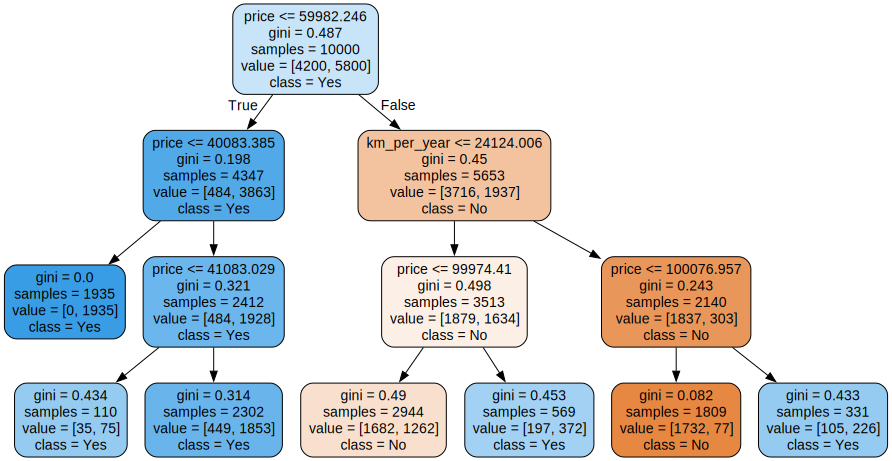

In [26]:
# Checking Decision Tree
features = x_un.columns
dot_data = export_graphviz(best_estimator, out_file=None, filled=True, rounded=True, class_names=['No','Yes'], feature_names=features)

graph = graphviz.Source(dot_data)
graph

# Part 02- Starting RandomSearch

In [31]:
# Creating RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

parameter_space = {
    'max_depth': [3,5],
    'min_samples_split': [32,64,128],
    'min_samples_leaf': [32,64,128],
    'criterion': ['gini','entropy']
}

search = RandomizedSearchCV(DecisionTreeClassifier(), parameter_space, cv=KFold(n_splits = 5), random_state=SEED, n_iter=16)
search.fit(x_un, y_un)
results = pd.DataFrame(search.cv_results_)

# Applying nested cross validation

scores = cross_val_score(search, x_un, y_un, cv = KFold(n_splits=5, shuffle=True))
best_estimator = search.best_estimator_
print(scores, print_score(scores), best_estimator)

Mean Accuracy: 78.69
Interval: (77.95406522028104, 79.42593477971896)
[0.7845 0.7935 0.783  0.788  0.7855] None DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=64)


In [33]:
# Customizing hyperparamets space

parameter_space = {
    'max_depth': [3,5,10,15,20,25,None],
    'min_samples_split': randint(32,128),
    'min_samples_leaf': randint(32,128),
    'criterion': ['gini','entropy']
}

search = RandomizedSearchCV(DecisionTreeClassifier(), parameter_space, cv=KFold(n_splits = 5), random_state=SEED, n_iter=16)
search.fit(x_un, y_un)
results = pd.DataFrame(search.cv_results_)

# Applying nested cross validation

scores = cross_val_score(search, x_un, y_un, cv = KFold(n_splits=5, shuffle=True))
best_estimator = search.best_estimator_
print(scores, print_score(scores), best_estimator)

Mean Accuracy: 78.67
Interval: (77.4756801098533, 79.8643198901467)
[0.797  0.7835 0.789  0.7845 0.7795] None DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


In [34]:
# Creating table to save results

results_order_by_mean = results.sort_values('mean_test_score', ascending=False)
for index, line in results_order_by_mean.iterrows():
    print('%.3f +-(%.3f) %s' % (line.mean_test_score, line.std_test_score * 2, line.params))

0.787 +-(0.009) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.785 +-(0.013) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 73, 'min_samples_split': 72}
0.785 +-(0.013) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.780 +-(0.015) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 125, 'min_samples_split': 59}
0.780 +-(0.013) {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 124, 'min_samples_split': 88}
0.780 +-(0.013) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 126, 'min_samples_split': 84}
0.779 +-(0.017) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 108, 'min_samples_split': 110}
0.775 +-(0.015) {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 104, 'min_samples_split': 88}
0.775 +-(0.021) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 93, 'min_samples_split': 111}
0.775 +-(0.017) {'criterion': 'gini', 'max_depth':

In [35]:
# Exploring with more interations (64 instead of 16)

parameter_space = {
    'max_depth': [3,5,10,15,20,25,None],
    'min_samples_split': randint(32,128),
    'min_samples_leaf': randint(32,128),
    'criterion': ['gini','entropy']
}

search = RandomizedSearchCV(DecisionTreeClassifier(), parameter_space, cv=KFold(n_splits = 5), random_state=SEED, n_iter=64)
search.fit(x_un, y_un)
results = pd.DataFrame(search.cv_results_)

# Applying nested cross validation

scores = cross_val_score(search, x_un, y_un, cv = KFold(n_splits=5, shuffle=True))
best_estimator = search.best_estimator_
print(scores, print_score(scores), best_estimator)

Mean Accuracy: 78.69
Interval: (76.01612640538113, 81.36387359461887)
[0.8015 0.7665 0.797  0.7935 0.776 ] None DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


In [43]:
# Here we can check that the difference between 64 interatios and 16 wasnt very clear.

results_order_by_mean = results.sort_values('mean_test_score', ascending=False)
for index, line in results_order_by_mean[:5].iterrows():
    print('%.3f +-(%.3f) %s' % (line.mean_test_score, line.std_test_score * 2, line.params))

0.781 +-(0.008) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 128, 'n_estimators': 10}
0.780 +-(0.014) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 10}
0.779 +-(0.017) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 10}
0.779 +-(0.009) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 128, 'n_estimators': 10}
0.779 +-(0.018) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 128, 'min_samples_split': 64, 'n_estimators': 10}


In [40]:
# Comparing RandomizedSearch vs GridSearchCV

parameter_space = {
    'n_estimators': [10, 100],
    'max_depth': [3,5],
    'min_samples_split': [32,64,128],
    'min_samples_leaf': [32,64,128],
    'bootstrap':[True, False],
    'criterion': ['gini','entropy']
}

tic = time.time()

search = GridSearchCV(RandomForestClassifier(), parameter_space, cv=KFold(n_splits = 5))
search.fit(x_un, y_un)

tac = time.time()
time_spend = tac - tic

print('%.2f Seconds' % time_spend)

results = pd.DataFrame(search.cv_results_)
results.head()

196.23 Seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.040000,0.006418,0.003200,0.000749,True,gini,3,32,32,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7520,0.7685,0.7805,0.7455,0.7605,0.7614,0.012306,136
1,0.333800,0.005912,0.012799,0.000980,True,gini,3,32,32,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7600,0.7755,0.7860,0.7695,0.7755,0.7733,0.008512,81
2,0.034800,0.000980,0.002600,0.000490,True,gini,3,32,64,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7660,0.7570,0.7725,0.7665,0.7765,0.7677,0.006623,117
3,0.363108,0.010194,0.012800,0.001166,True,gini,3,32,64,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7705,0.7740,0.7830,0.7705,0.7765,0.7749,0.004641,51
4,0.036800,0.002482,0.002200,0.000400,True,gini,3,32,128,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7630,0.7720,0.7645,0.7345,0.7885,0.7645,0.017519,129


In [42]:
# Checking results table with forest

results_order_by_mean = results.sort_values('mean_test_score', ascending=False)
for index, line in results_order_by_mean[:5].iterrows():
    print('%.3f +-(%.3f) %s' % (line.mean_test_score, line.std_test_score * 2, line.params))

0.781 +-(0.008) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 128, 'n_estimators': 10}
0.780 +-(0.014) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 10}
0.779 +-(0.017) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 10}
0.779 +-(0.009) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 128, 'n_estimators': 10}
0.779 +-(0.018) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 128, 'min_samples_split': 64, 'n_estimators': 10}


In [45]:
# Checking cross validation with time.

tic = time.time()

scores = cross_val_score(search, x_un, y_un, cv = KFold(n_splits=5, shuffle=True))
best_estimator = search.best_estimator_

tac = time.time()
time_spend = tac-tic
print(time_spend, scores, print_score(scores), best_estimator)

Mean Accuracy: 77.77000000000001
Interval: (76.33668217062649, 79.20331782937353)
847.6042368412018 [0.7695 0.774  0.79   0.781  0.774 ] None RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=32,
                       min_samples_split=128, n_estimators=10)


In [49]:
# Check with RandomizedSearchCV

parameter_space = {
    'n_estimators': [10, 100],
    'max_depth': [3,5],
    'min_samples_split': [32,64,128],
    'min_samples_leaf': [32,64,128],
    'bootstrap':[True, False],
    'criterion': ['gini','entropy']
}

tic = time.time()

search = RandomizedSearchCV(RandomForestClassifier(), parameter_space, cv=KFold(n_splits = 5), n_iter=80)
search.fit(x_un, y_un)

tac = time.time()
time_spend = tac - tic

print('%.2f Seconds' % time_spend)

results = pd.DataFrame(search.cv_results_)
results.head()

113.88 Seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.569594,0.025335,0.015805,0.001162,100,64,128,5,gini,False,"{'n_estimators': 100, 'min_samples_split': 64,...",0.7710,0.7755,0.7830,0.7695,0.7765,0.7751,0.004748,30
1,0.661599,0.015107,0.017800,0.001721,100,128,64,5,entropy,False,"{'n_estimators': 100, 'min_samples_split': 128...",0.7695,0.7755,0.7820,0.7705,0.7805,0.7756,0.005064,15
2,0.037400,0.001356,0.002800,0.000980,10,128,64,3,gini,True,"{'n_estimators': 10, 'min_samples_split': 128,...",0.7450,0.7755,0.7835,0.7380,0.7440,0.7572,0.018538,79
3,0.040400,0.003007,0.002400,0.000490,10,128,32,3,entropy,True,"{'n_estimators': 10, 'min_samples_split': 128,...",0.7625,0.7755,0.7590,0.7565,0.7595,0.7626,0.006726,73
4,0.046000,0.002967,0.003600,0.001356,10,32,128,3,entropy,False,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.7695,0.7575,0.7865,0.7460,0.7705,0.7660,0.013601,67


In [50]:
# Checking result

results_order_by_mean = results.sort_values('mean_test_score', ascending=False)
for index, line in results_order_by_mean[:5].iterrows():
    print('%.3f +-(%.3f) %s' % (line.mean_test_score, line.std_test_score * 2, line.params))

0.781 +-(0.012) {'n_estimators': 10, 'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.780 +-(0.011) {'n_estimators': 10, 'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}
0.779 +-(0.022) {'n_estimators': 10, 'min_samples_split': 64, 'min_samples_leaf': 64, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}
0.779 +-(0.013) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.778 +-(0.016) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}


In [51]:
# Checking cross validation for RandomizedSearchCV with time.

tic = time.time()

scores = cross_val_score(search, x_un, y_un, cv = KFold(n_splits=5, shuffle=True))
best_estimator = search.best_estimator_

tac = time.time()
time_spend = tac-tic
print(time_spend, scores, print_score(scores), best_estimator)

Mean Accuracy: 77.83
Interval: (76.22426029506647, 79.43573970493352)
454.85646057128906 [0.7775 0.765  0.7765 0.7835 0.789 ] None RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=32,
                       min_samples_split=64, n_estimators=10)


In [56]:
# Creating a situation when you cannot validate with cross validation. We will utilize StratifiedShuffleSplit

from sklearn.model_selection import train_test_split

# 0.6 train
# 0.2 test
# 0.2 validation

x_train_test, x_validation, y_train_test, y_validation = train_test_split(x_un, y_un, test_size=0.2, shuffle=True, stratify=y_un)
print(x_train_test.shape, x_validation.shape, y_train_test.shape, y_validation.shape)

parameter_space = {
    'n_estimators': [10, 100],
    'max_depth': [3,5],
    'min_samples_split': [32,64,128],
    'min_samples_leaf': [32,64,128],
    'bootstrap':[True, False],
    'criterion': ['gini','entropy']
}

split = StratifiedShuffleSplit(n_splits=1, test_size= 0.25)

tic = time.time()

search = RandomizedSearchCV(RandomForestClassifier(), parameter_space, cv=split, n_iter=80)
search.fit(x_train_test, y_train_test)

tac = time.time()
time_spend = tac - tic

print('%.2f Seconds' % time_spend)

results = pd.DataFrame(search.cv_results_)
results.head()

(8000, 3) (2000, 3) (8000,) (2000,)
16.80 Seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033999,0.0,0.004,0.0,10,32,128,3,entropy,True,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.7265,0.7265,0.0,80
1,0.032000,0.0,0.002,0.0,10,32,64,3,gini,False,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.7285,0.7285,0.0,78
2,0.053000,0.0,0.005,0.0,10,64,64,5,entropy,False,"{'n_estimators': 10, 'min_samples_split': 64, ...",0.7800,0.7800,0.0,2
3,0.049000,0.0,0.003,0.0,10,128,64,5,entropy,False,"{'n_estimators': 10, 'min_samples_split': 128,...",0.7785,0.7785,0.0,3
4,0.298000,0.0,0.015,0.0,100,64,32,3,entropy,True,"{'n_estimators': 100, 'min_samples_split': 64,...",0.7740,0.7740,0.0,36


In [60]:
# Using cross val score with the split

tic = time.time()

scores = cross_val_score(search, x_validation, y_validation, cv = split)
best_estimator = search.best_estimator_

tac = time.time()
time_spend = tac-tic
print(time_spend)
scores

4.917995452880859


array([0.78])